## 라이브러리 불러오기

In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [3]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """
    
    #우리는 MC방법을 이용해서 Value function V를 구할것이다.
    # How : 몇 번의 episode를 시행시켜보고, 그 episode들의 G(return)의 평균을 구해서
    # 그 평균값으로 V를 대체하자. 이를 위해 return G의 총 합과 횟수를 기록하자
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    #각각의 에피소드마다
    for i_episode in range(1, num_episodes + 1):
        # Print out which episode we're on, useful for debugging.
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()

        #An episode will be an array of (state, action, reward) tuples        
        #episode를 빈 array로 만들자
        episode = []
        #현재 state를 리셋하자
        state = env.reset()
        
       #빈칸1__실습pdf의 빨간 첫번째 빈칸식_
        #policy를 이용하여 state를 계속 업데이트 하며, 이것들을 episode에 저장하자
        for t in range(100):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
        
        #위에서 저장한 episode는 예를들면 다음과 같이 저장될 것이다
        # For example, epsiode is [((12, 10, False), 1, 0), ((15, 10, False), 1, 0), ((19, 10, False), 1, -1)]
        #states_in_episode에 위의 episode array에서 방문한 state들만 뽑아서 저장하자
        states_in_episode = [x[0] for x in episode]
        #각각의 방문했던 state마다
        for state in states_in_episode:
            #빈칸2_episode중에 처음으로 그 state에 방문한 idx를 first_occurence_idx에 저장하자.
            for i,x in enumerate(episode):
                if x[0]==state:
                    first_occurence_idx=i
                    break
            #빈칸3_처음 방문한 이후로 reward들을 G에 합하자
            G=0
            for i,x in enumerate(episode[first_occurence_idx:]):
                G += x[2]*(discount_factor**i)
            # 계산된 G를 해당 state의 returns_sum에 합하고, returns_count까지 이용하여 평균을 V에 대입하자
            returns_sum[state] += G
            returns_count[state] += 1.0
            #빈칸4_결국 우리가 구하고자 하는 state-value function V에는 어떤값을 대입??
            V[state] = returns_sum[state] / returns_count[state]

    return V    

## Policy정의

In [4]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is >= 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

## 각 state별 value funtion 값 plot해보기

Episode 10000/10000.

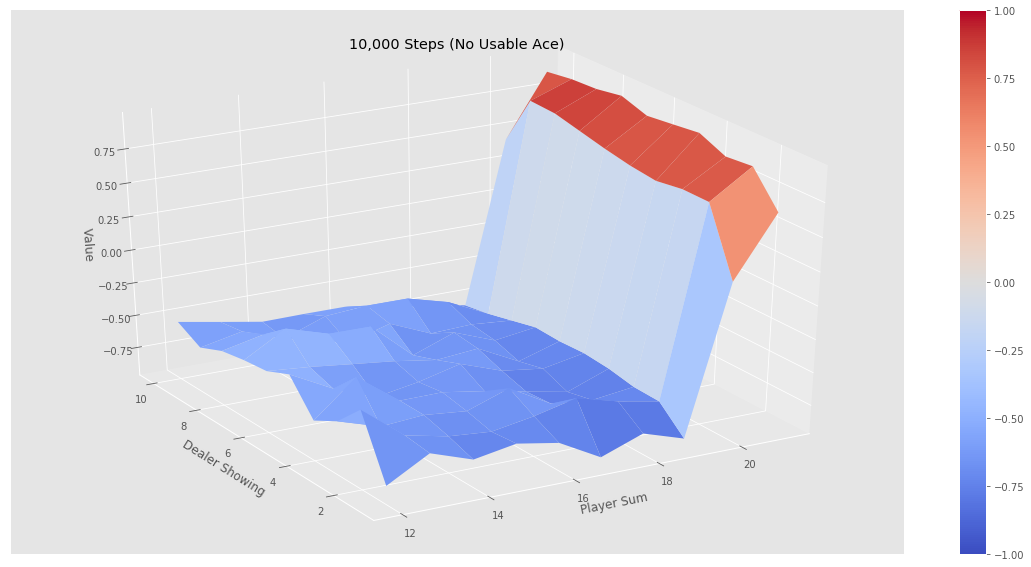

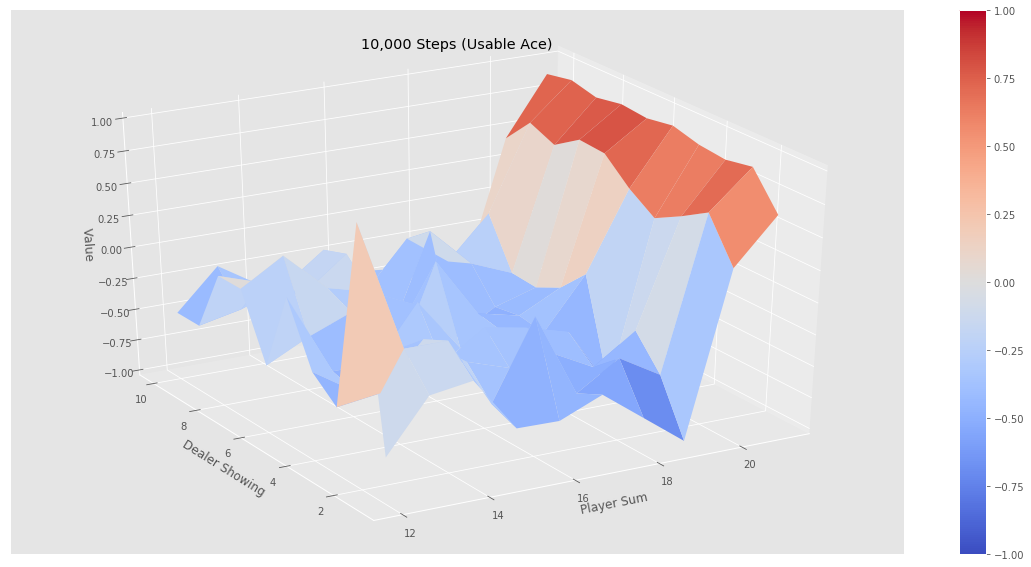

Episode 500000/500000.

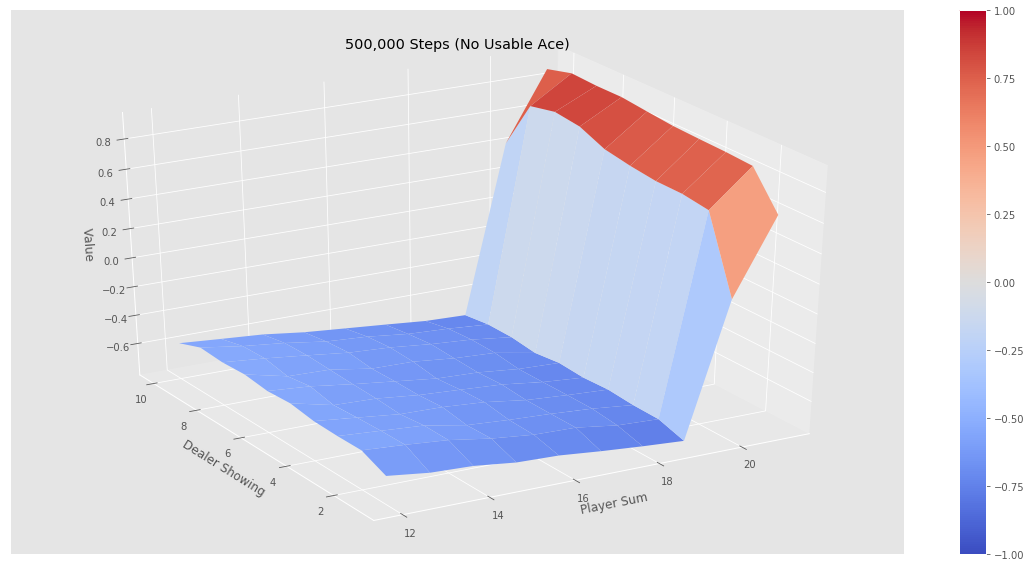

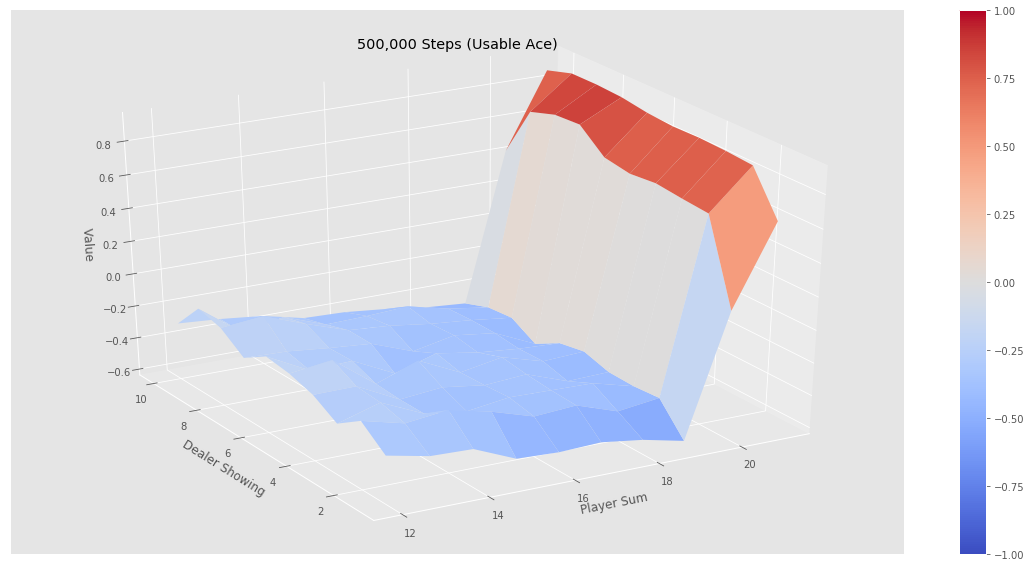

In [5]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")